In [403]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


In [404]:
#Reading the data
lead = pd.read_csv('Leads.csv')
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [405]:
lead.shape

(9240, 37)

In [406]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [407]:
#check for NA values in dataset
print(lead.isnull().sum())
print(lead.isnull().values.any())
print(lead.isnull().values.sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [408]:
# Checking the percentage of missing values

round(100*(lead.isnull().sum()/len(lead.index)), 2)


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

We can see that there are many columns present with fair no. of null values. We will deal with these in the data cleaning part

In [409]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [578]:
#checking duplicates
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

There is no duplicate value.

### Data Cleaning

In [411]:
# As per the problem statement there are select values for many column.Select values can be replaced with Nan.
# Thi smay have happened because customer did not select any option from the list.

lead = lead.replace('Select', np.nan)

In [412]:
#Checking the null percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [413]:
#Lets drop the columns having null values more than 70% as they are insgnificant for our analysis
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>70)].columns, 1)

In [414]:
#Checking the null percentage again

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

Lets try to analyze the columns having null values now and see if we can impute them.

In [415]:
#Analysing the column'Lead Quality'
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

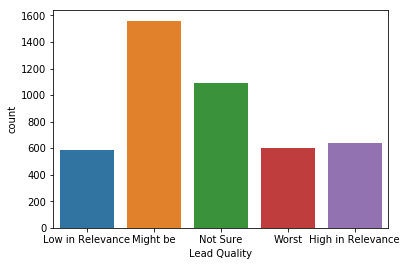

In [416]:
#Ploting the column'Lead Quality'

sns.countplot(lead['Lead Quality'])
plt.show()

In [417]:
#Lets impute the column 'Lead Quality' with Not sure as it is based on the employee's intuition.
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

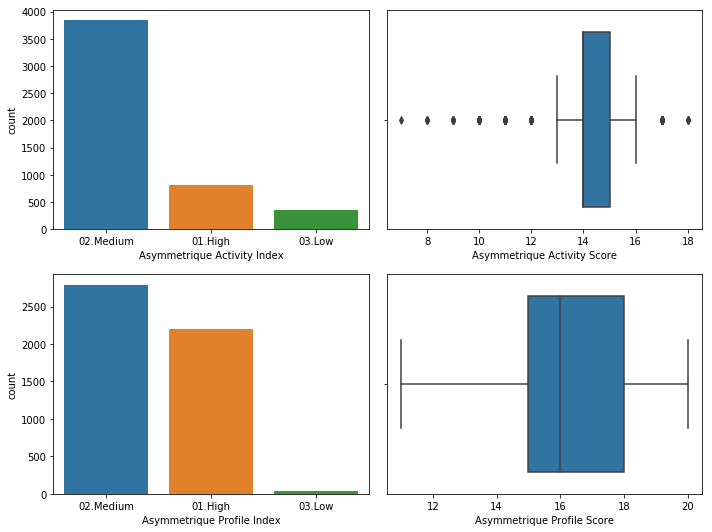

In [418]:
#Lets analyse the columns # Asymmetrique Activity Index  # Asymmetrique Profile Index      
# Asymmetrique Activity Score # Asymmetrique Profile Score  

fig, axs = plt.subplots(2,2, figsize = (10,7.5))
fig1 = sns.countplot(lead['Asymmetrique Activity Index'], ax = axs[0,0])
fig2 = sns.boxplot(lead['Asymmetrique Activity Score'], ax = axs[0,1])
fig3 = sns.countplot(lead['Asymmetrique Profile Index'], ax = axs[1,0])
fig4 = sns.boxplot(lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

From the above plot we see that there is no value we can impute. So lets drop these columns.

In [419]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [420]:
#Analysing the column City
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

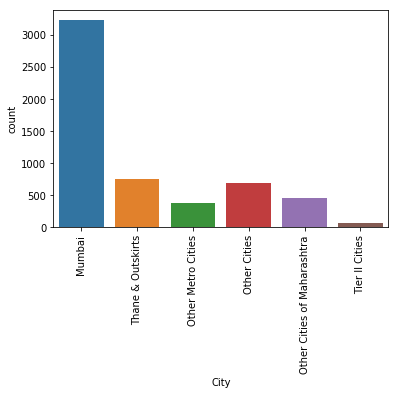

In [421]:
#Ploting the column'City'
sns.countplot(lead.City)
xticks(rotation = 90)
plt.show()

We see that more that 60% of values are Mumbai. So lets impute the Nans with Mumbai.

In [422]:
#Imputing column City
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [423]:
# Analysing the column Specialization
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

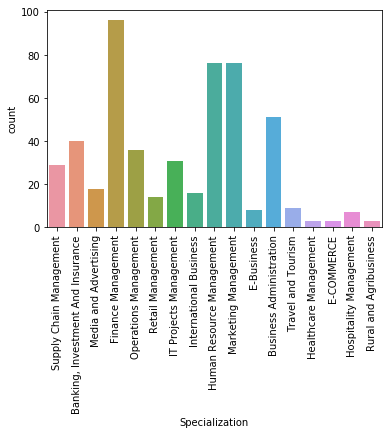

In [424]:
#Ploting the column'Specialization'
sns.countplot(data.Specialization)
xticks(rotation = 90)
plt.show()

The applicant may have left this blank field as no suitable option was available or he/she may be a student without any specialization. Lets make another catagory for this field as Other and impute the null values with the same.


In [425]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Other')

In [426]:
#lets check the null percentage again

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                   0.00
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [427]:
#Lets analyze the country column
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [428]:
# Country is India for most values so let's impute the same in missing values.
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [429]:
# LEts analyse the column 'What is your current occupation'

lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [430]:
#Around 86% data is Unemplyed. So lets impute the nan with Unemployed
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [431]:
#LEts analyse the column 'What matters most to you in choosing a course'
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [432]:
#More than 99% of the data is Better career prospects. We can replace the Nan with the same

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [433]:
#Analysing the column'Tags'

lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

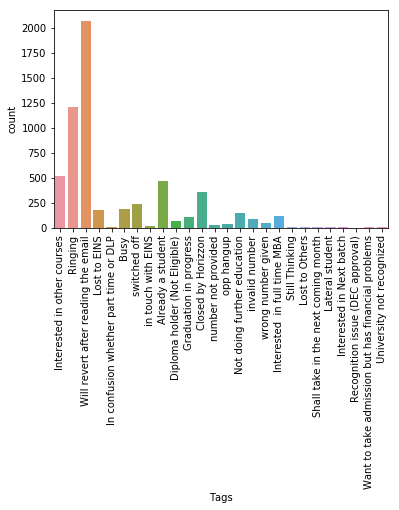

In [434]:
#Plotting 'Tags'

sns.countplot(lead.Tags)
xticks(rotation = 90)
plt.show()

In [435]:
#The Null values can be replaced with Will revert after reading the email

lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [436]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.39
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

We see that very few Null values are left. Lets drop these rows.

In [437]:
#Dropping rows with null values
lead.dropna(inplace = True)

In [438]:
#Checking the percentage again after delaing with all the null values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

In [439]:
lead.shape

(9074, 31)

We have retained most of our data. Lets proceed with EDA in the next step.

### EDA


In [440]:
#Analysing the variable Converted 

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted


37.85541106458012

We see that the convertion rate is only 37.8% which is very poor.

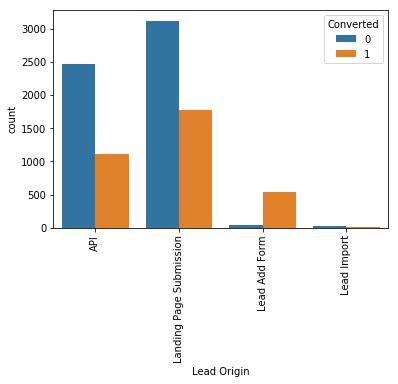

In [441]:
# Analysing the variable Lead Origin

sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()


Inference

- API and Landing Page Submission have considerable no of lead originated but the conversion rate is only around 35%.
- Lead Add Form has more than 90% conversion rate but count of lead is insignificant.
- Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


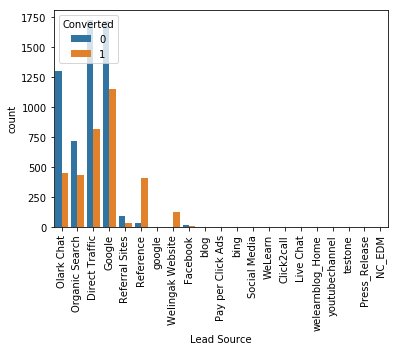

In [442]:
#ANalysing the column Lead Source

sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()

We see that there are many sources with a value almost zero. Lets group those into another category called Others

In [443]:
# Replacing google with Google as both are same
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

#grouping insignifacant Lead sources
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

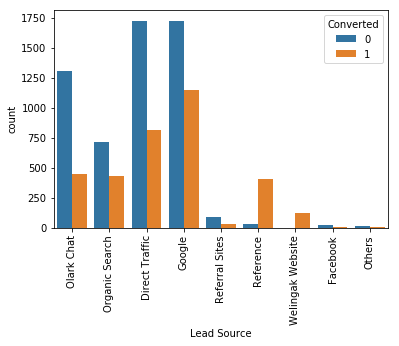

In [444]:
#Plotting "Lead Source" again
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()


Inference

- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.


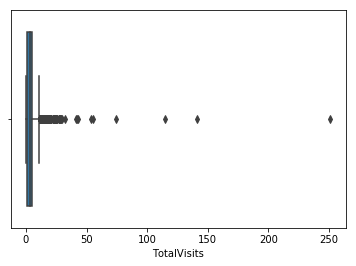

In [445]:
#Analysing the variable Total Visits

sns.boxplot(lead['TotalVisits'])
plt.show()

In [446]:
#LEts Cap the outliers

prcntl = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= prcntl[0]] = prcntl[0]
lead['TotalVisits'][lead['TotalVisits'] >= prcntl[1]] = prcntl[1]

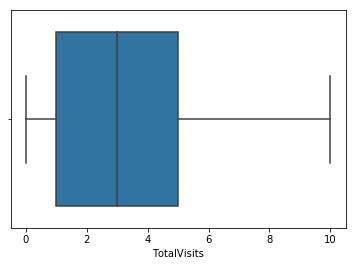

In [447]:
#Plotting again

sns.boxplot(lead['TotalVisits'])
plt.show()

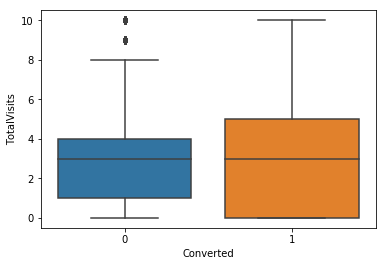

In [448]:
#Lets see how many are converted from Total Visits

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

As we can see median of both are same. No inference can be made from the plot.

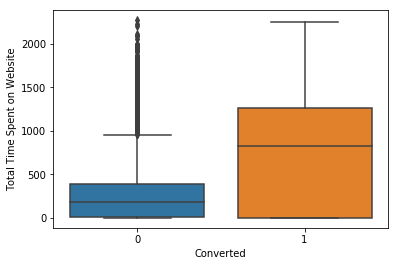

In [449]:
# Analysing the variable Total time spent on website

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()


Inference

- Leads spending more time on the weblise are more likely to be converted.

- We should make the website more engaging to make leads spend more time so that more leads can be converted.


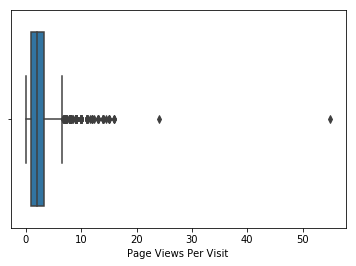

In [450]:
#Analysing the variable Page views per visit

sns.boxplot(lead['Page Views Per Visit'])
plt.show()

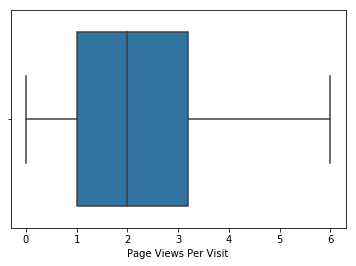

In [451]:
#Lets cap the outliers

prnctls = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= prnctls[0]] = prnctls[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= prnctls[1]] = prnctls[1]

sns.boxplot(lead['Page Views Per Visit'])
plt.show()

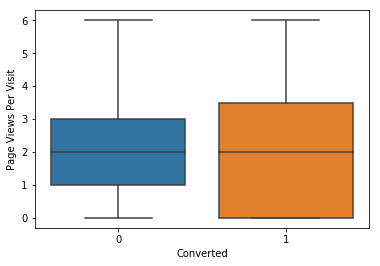

In [452]:
#COmparing COnverted and Page Views Per Visit

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

No inference can be made as both have same median

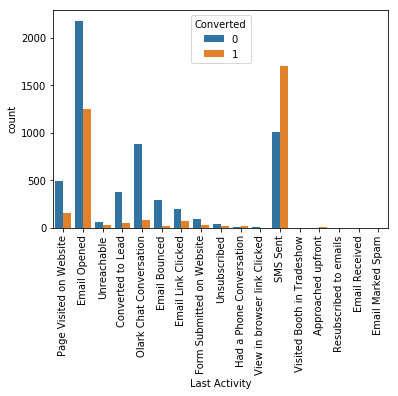

In [453]:
#Analysing the column Last Activity

sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()

Many categories in Last Activity has very less values. Lets group those to another category called Others

In [454]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

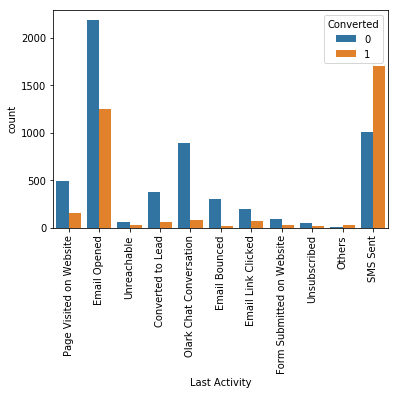

In [455]:
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()


Inference

- Most of the lead have their Email opened as their last activity.
-  Conversion rate for leads with last activity as SMS Sent is almost 60%.



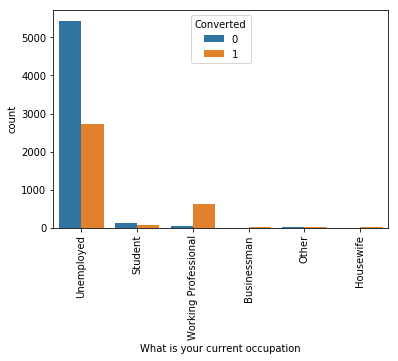

In [456]:
#Analysing the variable "What is your current occupation"

sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()

Inference
- As we can see the conversion rate of Unemployed people is only around 30% while most applicants are Unemployed.

- Working professionals are more likely to join the course.

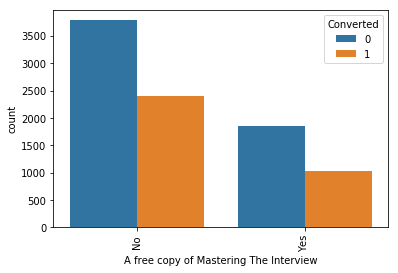

In [457]:
#Analysing the variable "What is your current occupation"

sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
xticks(rotation = 90)
plt.show()

No inference can be made from the above.

In [458]:
#counting number of columns in following columns in 'Leads_converted_hot' dataframe
print(lead['Do Not Email'].value_counts())
print(lead['Do Not Call'].value_counts())
print(lead['Search'].value_counts())
print(lead['Newspaper Article'].value_counts())
print(lead['Newspaper'].value_counts())
print(lead['Digital Advertisement'].value_counts())
print(lead['Through Recommendations'].value_counts())
print(lead['A free copy of Mastering The Interview'].value_counts())
print(lead['What is your current occupation'].value_counts())
print(lead['What matters most to you in choosing a course'].value_counts())

No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     9060
Yes      14
Name: Search, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64
Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64


Most of the columns having No value greater than 99% and adding no value to the data. We can drop them.

In [459]:
#Dropping the insignificant columns.

lead = lead.drop(['Prospect ID','What matters most to you in choosing a course','Search','Magazine',
                  'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                  'Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content',
                  'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [460]:
lead.shape

(9074, 16)

In [461]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Other,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Other,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Other,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Data Preparation

In [462]:
# Converting Yes to 1 and No to 0

varlist =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)

In [463]:
#Creating dummy features for categorical variables

dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'What is your current occupation','Tags','Lead Quality','City',
                              'Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [464]:
#Merging the dummy1 to the original dataframe

lead = pd.concat([lead, dummy1], axis=1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,...,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Other,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Other,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,

In [465]:
lead.shape

(9074, 109)

In [466]:
#Dropping the columns for which dummies were created

lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                  'What is your current occupation','Tags','Lead Quality','City',
                  'Last Notable Activity'], axis = 1)

lead.shape

(9074, 100)

In [467]:
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

### Train-Split Data

In [468]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,

In [469]:
X.shape

(9074, 98)

In [470]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [471]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [472]:
X_train.shape

(6351, 98)

In [473]:
X_test.shape

(2723, 98)

We have splilt the data in 70-30 ratio. Lets move to feature scaling.

### Feature Scaling

In [474]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.43,-0.16,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.43,-0.54,-0.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.43,1.64,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.64,2.02,0.12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [475]:
# Checking the Conversion Rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

We have around 38% of conversion rate. Lets Build the model using Logistic regression in the next step.


### Building the Model Using Logistic Regression

In [476]:
import statsmodels.api as sm

In [477]:
# Logistic regression model
model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           98
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.9
Date:                Mon, 07 Oct 2019   Deviance:                       2477.8
Time:                        22:42:58   Pearson chi2:                 3.61e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     22.9459   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -1.3930      0.337     -4.136      0.000      -2.053      -0.733
Do Not Call                                               23.6777   1.36e+05      0.000      1.000   -2.67e+05    2.67e+05
TotalVisits                                                0.1817      0.087      2.084      0.037       0.011       0.352
Total Time Spent on Website                                1.1453      0.064     17.841      0.000       1.020       1.271
Page Views Per Visit                                      -0.3249      0.099     -3.272      0.001      -0.520      -0.130
Lead Origin_Landing Page Submission                       -0.9741      0.223     -4.365      0.000      -1.412      -0.537
Lead Origin_Lead Add Form                                 -0.2941      1.335     -0.220      0.826      -2.910       2.322
Lead Origin_Lead Import                                   29.6602   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                     -28.5517   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                         0.2010      0.156      1.290      0.197      -0.104       0.506
Lead Source_Olark Chat                                     0.8885      0.235      3.782      0.000       0.428       1.349
Lead Source_Organic Search                                 0.1919      0.212      0.906      0.365      -0.223       0.607
Lead Source_Others                                         0.7657      0.815      0.939      0.348      -0.832       2.364
Lead Source_Reference                                      1.7598      1.394      1.263      0.207      -0.972       4.491
Lead Source_Referral Sites                                -0.1000      0.494     -0.202      0.840      -1.069       0.869
Lead Source_Welingak Website                               5.3825      1.528      3.522      0.000       2.387       8.378
Last Activity_Email Bounced                               -0.4004      0.876     -0.457      0.648      -2.117       1.317
Last Activity_Email Link Clicked                           0.8592      0.652      1.319      0.187      -0.418       2.136
Last Activity_Email Opened                                 0.0264      0.389      0.068      0.946      -0.736       0.789
Last Activity_Form Submitted on Website                    0.1490      0.597      0.249      0.803      -1.022       1.320
Last Activity_Olark Chat Conversation                     -0.5184      0.395     -1.312      0.190      -1.293       0.256
Last Activity_Others                                       1.4673      1.196      1.226

### RFE : Selectimg top 15 features

In [478]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [479]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False])

In [480]:
#Listing the features and analysing the ranks

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 42),
 ('TotalVisits', False, 50),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 48),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Others', False, 54),
 ('Lead Source_Reference', False, 84),
 ('Lead Source_Referral Sites', False, 67),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 37),
 ('Last Activity_Email Link Clicked', False, 46),
 ('Last Activity_Email Opened', False, 73),
 ('Last Activity_Form Submitted on Website', False, 78),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Others', False, 10),
 ('Last Activity_Page Visited on Website', False, 47),
 ('Last Activity_SMS Sent', False,

In [481]:
#Checking the top 15 columns
topcols = X_train.columns[rfe.support_]

topcols



Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

These are the columns selected by RFE

In [482]:
#Rejected columns

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Speciali

### Assessing the Model using StatsModels

In [483]:
X_train_sm = sm.add_constant(X_train[topcols])
model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1579.7
Date:                Mon, 07 Oct 2019   Deviance:                       3159.4
Time:                        22:43:06   Pearson chi2:                 3.13e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8388      0.213     -8.638      0.000      -2.256      -1.422
Do Not Email                                            -1.2901      0.214     -6.040      0.000      -1.709      -0.871
Lead Origin_Lead Add Form                                1.0391      0.361      2.882      0.004       0.332       1.746
Lead Source_Welingak Website                             3.4683      0.817      4.244      0.000       1.867       5.070
What is your current occupation_Working Professional     1.2770      0.287      4.452      0.000       0.715       1.839
Tags_Busy                                                3.5326      0.331     10.674      0.000       2.884       4.181
Tags_Closed by Horizzon                                  7.7308      0.762     10.152      0.000       6.238       9.223
Tags_Lost to EINS                                        8.9495      0.753     11.889      0.000       7.474      10.425
Tags_Ringing                                            -1.9939      0.339     -5.883      0.000      -2.658      -1.330
Tags_Will revert after reading the email                 3.7217      0.226     16.449      0.000       3.278       4.165
Tags_invalid number                                    -22.4878   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_number not provided                               -22.9675   2.33e+04     -0.001      0.999   -4.57e+04    4.57e+04
Tags_switched off                                       -2.5983      0.588     -4.415      0.000      -3.752      -1.445
Lead Quality_Not Sure                                   -3.3581      0.129    -26.079      0.000      -3.610      -3.106
Lead Quality_Worst                                      -3.8185      0.843     -4.530      0.000      -5.471      -2.166
Last Notable Activity_SMS Sent                           2.8042      0.123     22.864      0.000       2.564       3.045
========================================================================================================================
"""

In [484]:
#Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[topcols].columns
vif['VIF'] = [variance_inflation_factor(X_train[topcols].values, i) for i in range(X_train[topcols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.87
12,Lead Quality_Not Sure,2.83
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.56
14,Last Notable Activity_SMS Sent,1.54
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11


We see that Tags_invalid number and Tags_number not provided have very high P-value. Lets drop Tags_invalid number

In [485]:
# Dropping Tags_invalid number

topcols = topcols.drop('Tags_invalid number',1)

In [486]:
#Building the model again

X_train_sm = sm.add_constant(X_train[topcols])
model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.8
Date:                Mon, 07 Oct 2019   Deviance:                       3171.6
Time:                        22:43:07   Pearson chi2:                 3.08e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0029      0.215     -9.300      0.000      -2.425      -1.581
Do Not Email                                            -1.2838      0.213     -6.028      0.000      -1.701      -0.866
Lead Origin_Lead Add Form                                1.0711      0.362      2.957      0.003       0.361       1.781
Lead Source_Welingak Website                             3.4313      0.818      4.197      0.000       1.829       5.034
What is your current occupation_Working Professional     1.3170      0.290      4.545      0.000       0.749       1.885
Tags_Busy                                                3.7141      0.330     11.256      0.000       3.067       4.361
Tags_Closed by Horizzon                                  7.8819      0.762     10.342      0.000       6.388       9.376
Tags_Lost to EINS                                        9.1061      0.754     12.085      0.000       7.629      10.583
Tags_Ringing                                            -1.7954      0.337     -5.322      0.000      -2.457      -1.134
Tags_Will revert after reading the email                 3.8844      0.228     17.038      0.000       3.438       4.331
Tags_number not provided                               -21.7668   1.42e+04     -0.002      0.999   -2.78e+04    2.78e+04
Tags_switched off                                       -2.3933      0.587     -4.074      0.000      -3.545      -1.242
Lead Quality_Not Sure                                   -3.3493      0.129    -26.060      0.000      -3.601      -3.097
Lead Quality_Worst                                      -3.8282      0.843     -4.539      0.000      -5.481      -2.175
Last Notable Activity_SMS Sent                           2.7603      0.121     22.863      0.000       2.524       2.997
========================================================================================================================
"""

In [487]:
#Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[topcols].columns
vif['VIF'] = [variance_inflation_factor(X_train[topcols].values, i) for i in range(X_train[topcols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.82
11,Lead Quality_Not Sure,2.77
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.54
13,Last Notable Activity_SMS Sent,1.53
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11


In [488]:
#Dropping Tags_number not provided 
topcols = topcols.drop('Tags_number not provided',1)

In [489]:
#Building the model again

X_train_sm = sm.add_constant(X_train[topcols])
model4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Mon, 07 Oct 2019   Deviance:                       3177.6
Time:                        22:43:08   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

Now all P-values of the features are almost zero. Lets check VIF in the next step

In [490]:
#Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[topcols].columns
vif['VIF'] = [variance_inflation_factor(X_train[topcols].values, i) for i in range(X_train[topcols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.81
10,Lead Quality_Not Sure,2.76
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.54
12,Last Notable Activity_SMS Sent,1.52
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
4,Tags_Busy,1.11
0,Do Not Email,1.10


Now all P-values and VIFs look good. Lets get the predicted values on our training model.

In [491]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009   0.19
1012   0.19
9226   0.00
4750   0.78
7987   0.98
1281   0.99
2880   0.19
4971   0.75
7536   0.87
1248   0.00
dtype: float64

In [492]:
#Reshaping the predicted data

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.88037158e-01, 1.94070077e-01, 8.04879357e-04, 7.82076694e-01,
       9.77003470e-01, 9.90227993e-01, 1.88037158e-01, 7.53103755e-01,
       8.67356930e-01, 8.04879357e-04])

In [493]:
#Creating a dataframe with converted and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.19,3009
1,0,0.19,1012
2,0,0.00,9226
3,1,0.78,4750
4,1,0.98,7987


In [494]:
#Creating a new column Prediction
#if the Converted_prob is greater than 0.5 then Predicted is 1 else 0

y_train_pred_final['Prediction'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Prediction
0,0,0.19,3009,0
1,0,0.19,1012,0
2,0,0.00,9226,0
3,1,0.78,4750,1
4,1,0.98,7987,1


### Confusion Matrix



In [495]:
from sklearn import metrics

In [496]:
# Confusion matrix 
con_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction )
print(con_mat)

[[3756  149]
 [ 363 2083]]


In [497]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [498]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction))



0.9193827743662415


We got almost 92% of accuracy at the threshold 0.5. Lets Check other metrics.

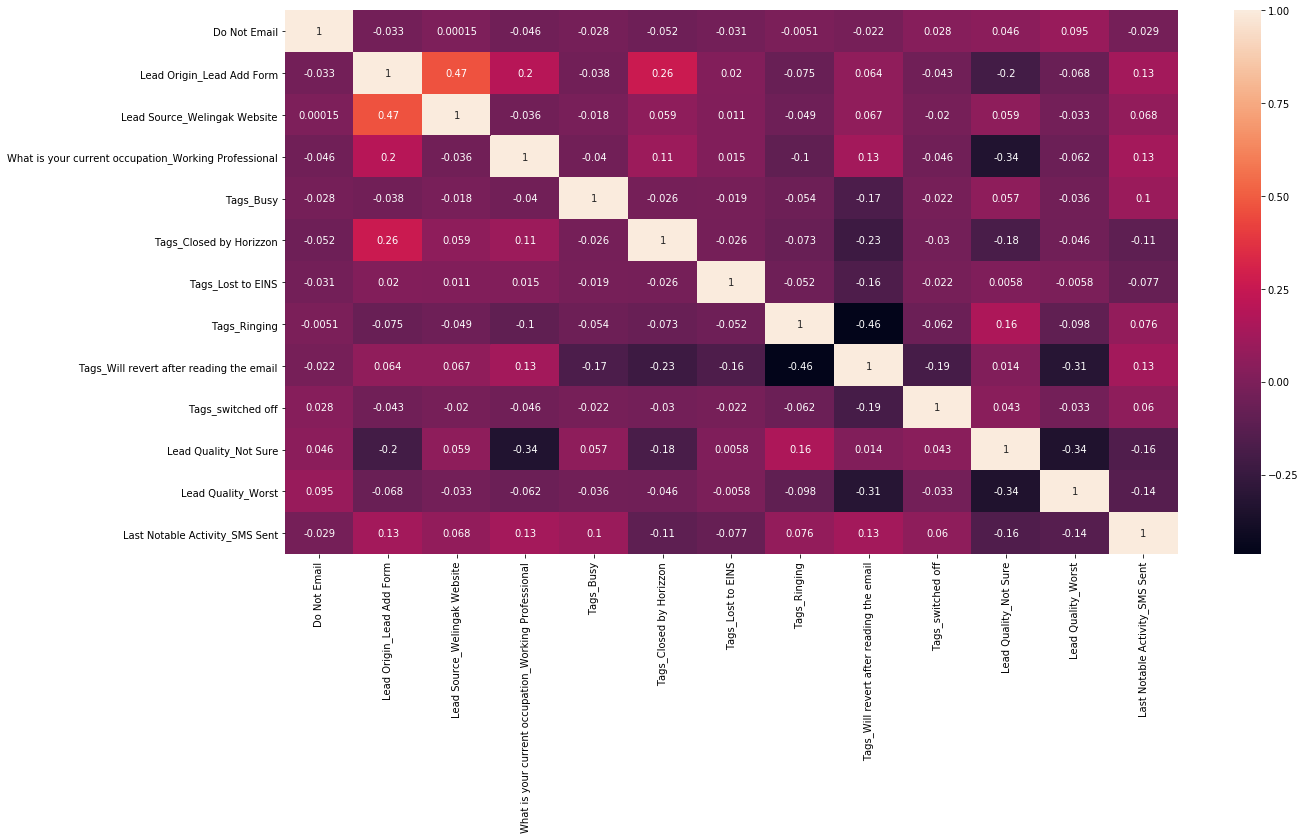

In [499]:
# Let's check the correlation matrix of the selected features
plt.figure(figsize = (20,10))       
sns.heatmap(X_train[topcols].corr(),annot = True)
plt.show()


### Metrics beyond simply accuracy


In [500]:
TP = con_mat[1,1] # true positive 
TN = con_mat[0,0] # true negatives
FP = con_mat[0,1] # false positives
FN = con_mat[1,0] # false negatives

In [501]:
# Calculating the sensitivity of our model
TP / float(TP+FN)

0.8515944399018807

In [502]:
# Calculating the specificity of our model
TN / float(TN+FP)

0.9618437900128041

In [503]:
# Calculating false postive rate - predicting converted when customer did not actually have converted
print(FP/ float(TN+FP))

0.038156209987195905


This is good. Only 3.8% was predicted as converted while actually it was not predicted.

In [504]:
# positive predictive value 
print (TP / float(TP+FP))

0.9332437275985663


Of all the actual conversions 93% were correctly predicted.

In [505]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9118718135469774


Of all the actual non-conversions 91% were correctly predicted as non converted.

### Plotting the ROC Curve¶


In [506]:
#Defining the function to draw roc curve

def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [507]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob,
                                         drop_intermediate = False )

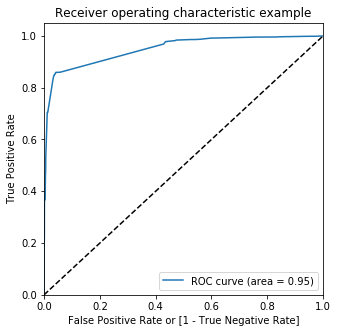

In [508]:
#Plotting the ROC
roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)



An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
-  The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
-    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



The ROC curve area is 95% which is very good but we need assumed the cutoff point tobe 0.5 while Making the Prediction. We need to find the optimal Cut-off point to that we get a balanced sensitivity and specificity score.

### Optimal Cut-off Point 

In [509]:
#different probability cutoffs 
points = [float(x)/10 for x in range(10)]
for i in points:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()



,Converted,Converted_prob,Lead ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.19,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1


In [510]:
#accuracy sensitivity and specificity for different probability cutoffs.

prob_points = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

points = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in points:
    con_mat1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    sum_total=sum(sum(con_mat1))
    Accuracy = (con_mat1[0,0]+con_mat1[1,1])/sum_total
    
    Specificity = con_mat1[0,0]/(con_mat1[0,0]+con_mat1[0,1])
    Sensitivity = con_mat1[1,1]/(con_mat1[1,0]+con_mat1[1,1])
    prob_points.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
    
print(prob_points)



      Probability  Accuracy  Sensitivity  Specificity
0.00         0.00      0.39         1.00         0.00
0.10         0.10      0.71         0.98         0.53
0.20         0.20      0.91         0.86         0.94
0.30         0.30      0.92         0.86         0.96
0.40         0.40      0.92         0.86         0.96
0.50         0.50      0.92         0.85         0.96
0.60         0.60      0.92         0.85         0.96
0.70         0.70      0.92         0.85         0.97
0.80         0.80      0.88         0.71         0.99
0.90         0.90      0.81         0.52         0.99


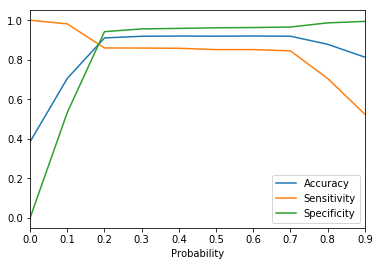

In [511]:
# plotting accuracy,sensitivity and specificity for various probabilities to find the optimal point.

prob_points.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()



From the above plot we can see that for the probability 0.2 all three metrics are converging at at single point. This means 0.2 is the optimal cutoff point. Lets find out precision and recall to confirm this.

In [512]:
#Adding the prediction column for cutoff point 0.2

y_train_pred_final['final_prediction'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.19,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [513]:
#Adding lead score to the trained data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction,Lead_Score
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.19,1012,0,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [514]:
# checking the overall accuracy for the new predicted values with cutoff 0.2.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

con_mat3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction )
con_mat3

TP = con_mat3[1,1] # true positive 
TN = con_mat3[0,0] # true negatives
FP = con_mat3[0,1] # false positives
FN = con_mat3[1,0] # false negatives

In [515]:
# calculating sensitivity 

TP / float(TP+FN)

0.8597710547833197

In [516]:
# calculatimg specificity
TN / float(TN+FP)

0.9421254801536492

In [517]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.05787451984635083


In [518]:
# Calculating Positive predictive value 
print (TP / float(TP+FP))

0.9029626449119794


In [519]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.9147190452511188


### Precision and Recall :

In [520]:
#creating confusion matrix 

con_mat4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction)
con_mat4

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

In [521]:
TP = con_mat4[1,1] # true positive 
TN = con_mat4[0,0] # true negatives
FP = con_mat4[0,1] # false positives
FN = con_mat4[1,0] # false negatives

In [522]:
#Precision value

print(TP / (TP + FP))



0.9332437275985663


In [523]:
## Recall value
print(TP / (TP + FN))

0.8515944399018807


In [524]:
#Lets use sklearn utilities to find Precision and Recall value

from sklearn.metrics import precision_score, recall_score


In [525]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Prediction)

0.9332437275985663

In [526]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Prediction)

0.8515944399018807

We see that we are getting same value as we calculated manually using the confusion matrix without the utility.

### Precision and recall tradeoff

In [527]:
from sklearn.metrics import precision_recall_curve

In [528]:
y_train_pred_final.Converted, y_train_pred_final.Prediction

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
        ..
 6301    1
 6302    0
 6303    1
 6304    1
 6305    1
 6306    1
 6307    0
 6308    0
 6309    0
 6310    1
 6311    1
 6312    0
 6313    0
 6314    0
 6315    1
 6316    1
 6317    1
 6318    0
 6319    0
 6320    0
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0

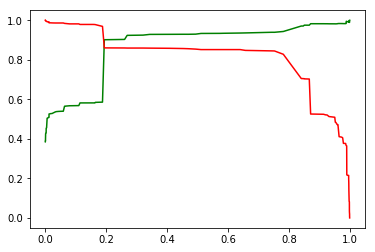

In [529]:
#Plotting the precision recall curve

precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

Here, threshold value is around 0.2 which is equal to the optimum point of cut of probability. So we are keeping this model.


### Predictions on the Test set

In [530]:
#Scaling the test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [531]:
X_test = X_test[topcols]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [532]:
#Adding constant to the X-test
X_test_sm = sm.add_constant(X_test)

In [533]:
#making predictions on test data
y_test_pred = res.predict(X_test_sm)

In [534]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.19
1490,0.96
7936,0.19
4216,1.00
3830,0.19


In [535]:
# Lets convert  y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [536]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [537]:
#Resetting the index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [538]:
## Merging y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.19
1,1,1490,0.96
2,0,7936,0.19
3,1,4216,1.00
4,0,3830,0.19


In [539]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.19
1,1,1490,0.96
2,0,7936,0.19
3,1,4216,1.00
4,0,3830,0.19


In [540]:
#assigning final predicted values as per the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.19,0
1,1,1490,0.96,1
2,0,7936,0.19,0
3,1,4216,1.00,1
4,0,3830,0.19,0


In [541]:
# Checkipng the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)


0.906720528828498

In [542]:
con_mat5 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
con_mat5

array([[1635,   99],
       [ 155,  834]], dtype=int64)

In [543]:
TP = con_mat5[1,1] # true positive 
TN = con_mat5[0,0] # true negatives
FP = con_mat5[0,1] # false positives
FN = con_mat5[1,0] # false negatives

In [544]:
# Checking the sensitivity of the final model
TP / float(TP+FN)

0.8432760364004045

In [545]:
#Checking the specificity of the final model
TN / float(TN+FP)

0.9429065743944637

In [546]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.05709342560553633


In [547]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8938906752411575


In [548]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9134078212290503


In [549]:
#precision
con_mat5[1,1]/(con_mat5[0,1]+con_mat5[1,1])

0.8938906752411575

In [550]:
#recall
con_mat5[1,1]/(con_mat5[1,0]+con_mat5[1,1])

0.8432760364004045

In [551]:
y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.19,0
1,1,1490,0.96,1
2,0,7936,0.19,0
3,1,4216,1.00,1
4,0,3830,0.19,0


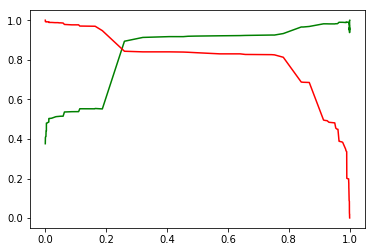

In [552]:
#Plotting the precision recall curve
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

We can see that the optimal point is little more that 0.2 which is acceptable.

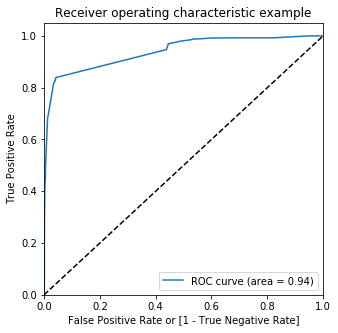

In [553]:
#Plotting the roc curve

fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate = False)

roc(y_pred_final.Converted, y_pred_final.Converted_prob)


The area under the curve is 0.94 which is very good and it proves that our model is a precise one.

In [554]:
#Assigning lead score to y_pred_final

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.19,0,19
1,1,1490,0.96,1,96
2,0,7936,0.19,0,19
3,1,4216,1.00,1,100
4,0,3830,0.19,0,19


In [562]:
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [564]:
topcols

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Applying the model to the original data and predicting lead probability.


In [569]:
#Applying the model to the original data
lead_pred = lead[topcols]
lead_pred.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [570]:
#Adding constand
lead_pred_sm = sm.add_constant(lead_pred)

In [571]:
#Making prediction
lead_pred = res.predict(lead_pred_sm)

In [572]:
# Converting lead_pred to a dataframe which is an array
lead_pred = pd.DataFrame(lead_pred)
lead_pred.head()

,0
0,0.11
1,0.00
2,0.87
3,0.00
4,0.87


In [577]:
lead['Lead_prob'] = lead_pred.values*100
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead_prob
0,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11.02
1,660728,0,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.08
2,660727,0,0,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,86.74
3,660719,0,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.08
4,660681,0,0,1,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,

Now we have lead probability for each Lead Number which business can refer and decide if it is a hot lead or not.

### Finding the answers of the subjective questions.

In [555]:
#Selecting the coefficients of the selected features from our final model excluding the intercept so that we 
#find out the importance of each feature in the model.

pd.options.display.float_format = '{:.2f}'.format
features_list = res.params[1:]
features_list

Do Not Email                                           -1.30
Lead Origin_Lead Add Form                               1.09
Lead Source_Welingak Website                            3.41
What is your current occupation_Working Professional    1.34
Tags_Busy                                               3.80
Tags_Closed by Horizzon                                 7.96
Tags_Lost to EINS                                       9.18
Tags_Ringing                                           -1.69
Tags_Will revert after reading the email                3.97
Tags_switched off                                      -2.29
Lead Quality_Not Sure                                  -3.34
Lead Quality_Worst                                     -3.76
Last Notable Activity_SMS Sent                          2.74
dtype: float64

In [556]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_imp = features_list
feature_imp = 100.0 * (feature_imp / feature_imp.max())
feature_imp

Do Not Email                                           -14.18
Lead Origin_Lead Add Form                               11.87
Lead Source_Welingak Website                            37.19
What is your current occupation_Working Professional    14.60
Tags_Busy                                               41.44
Tags_Closed by Horizzon                                 86.68
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -18.46
Tags_Will revert after reading the email                43.22
Tags_switched off                                      -24.93
Lead Quality_Not Sure                                  -36.40
Lead Quality_Worst                                     -40.99
Last Notable Activity_SMS Sent                          29.86
dtype: float64

In [557]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_imp,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
Lead Origin_Lead Add Form                               10
Lead Source_Welingak Website                             9
What is your current occupation_Working Professional     7
Tags_Busy                                                0
Tags_Closed by Horizzon                                  1
Tags_Lost to EINS                                        3
Tags_Ringing                                            12
Tags_Will revert after reading the email                 2
Tags_switched off                                        4
Lead Quality_Not Sure                                    8
Lead Quality_Worst                                       5
Last Notable Activity_SMS Sent                           6
dtype: int64

<Figure size 864x576 with 0 Axes>

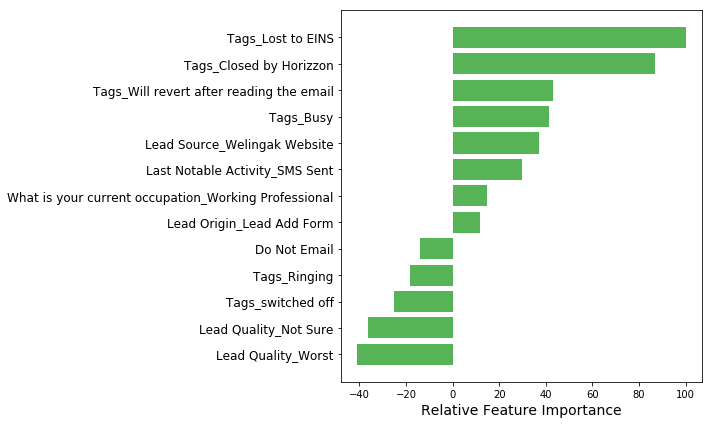

In [558]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_imp[sorted_idx], align='center', color = 'tab:green',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[topcols].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()
